# **QUES-1**

Enter the value of n: 5
Enter the value of p: 0.6
Enter the value of N: 5000


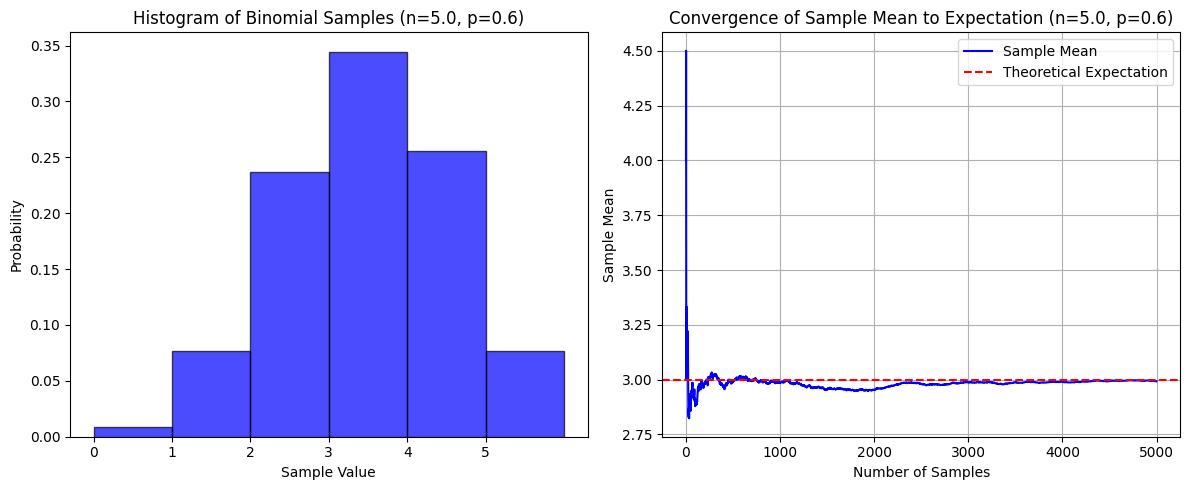

Final Simulated Expectation of Binomial(5.0, 0.6): 2.9928
Theoretical Expectation: 3.0000


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import math

def inverse_transform_binomial(n, p, n_samples=1000):
    samples = np.zeros(n_samples)
    n=int(n)

    for i in range(n_samples):
        u = np.random.uniform(0, 1)

        cumulative_prob = 0
        k = 0

        while cumulative_prob < u:
            prob_k = (math.comb(n, k)) * (p ** k) * ((1 - p) ** (n - k))
            cumulative_prob += prob_k
            k += 1

        samples[i] = k - 1

    return samples

n=float(input("Enter the value of n: "))
p=float(input("Enter the value of p: "))
N=int(input("Enter the value of N: "))


samples = inverse_transform_binomial(n, p, n_samples=N)

running_mean = np.cumsum(samples) / np.arange(1, N+1)

theoretical_expectation = n * p

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

axs[0].hist(samples, bins=range(int(n) + 2), density=True, color='b', edgecolor='black', alpha=0.7)
axs[0].set_title(f"Histogram of Binomial Samples (n={n}, p={p})")
axs[0].set_xlabel("Sample Value")
axs[0].set_ylabel("Probability")
axs[0].set_xticks(range(int(n) + 1))


axs[1].plot(running_mean, label="Sample Mean", color="blue")
axs[1].axhline(y=theoretical_expectation, color="red", linestyle="--", label="Theoretical Expectation")
axs[1].set_xlabel("Number of Samples")
axs[1].set_ylabel("Sample Mean")
axs[1].set_title(f"Convergence of Sample Mean to Expectation (n={n}, p={p})")
axs[1].legend()
axs[1].grid()

plt.tight_layout()
plt.show()

print(f"Final Simulated Expectation of Binomial({n}, {p}): {running_mean[-1]:.4f}")
print(f"Theoretical Expectation: {theoretical_expectation:.4f}")

#N=5
#P=0.6
#N=5000


# **QUES-2**

enter the value of N10000


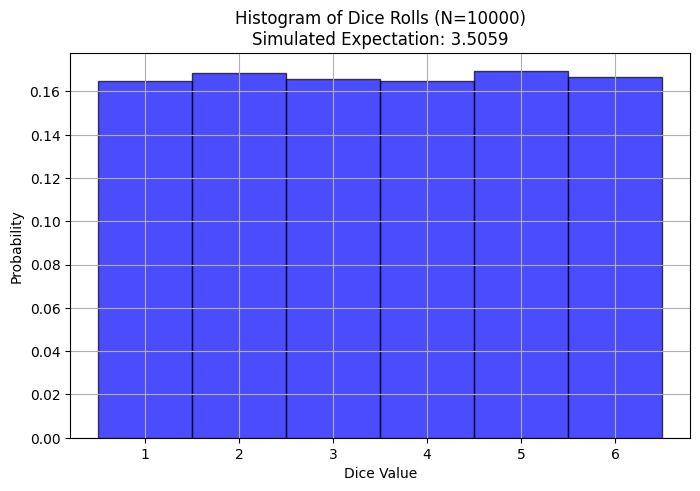

Simulated Expectation of Dice Roll: 3.5059
Theoretical Expectation: 3.5000


In [4]:
N = int(input("enter the value of N"))

dice_rolls = np.random.randint(1, 7, size=N)

simulated_expectation = np.mean(dice_rolls)

theoretical_expectation = 3.5

plt.figure(figsize=(8, 5))
plt.hist(dice_rolls, bins=np.arange(1, 8)-0.5, density=True, color='b', edgecolor='black', alpha=0.7)
plt.xticks(range(1, 7))
plt.xlabel("Dice Value")
plt.ylabel("Probability")
plt.title(f"Histogram of Dice Rolls (N={N})\nSimulated Expectation: {simulated_expectation:.4f}")
plt.grid()
plt.show()

print(f"Simulated Expectation of Dice Roll: {simulated_expectation:.4f}")
print(f"Theoretical Expectation: {theoretical_expectation:.4f}")

#N=10000


# **QUES-3**

enter the value of lambda2
emter the value of N10000


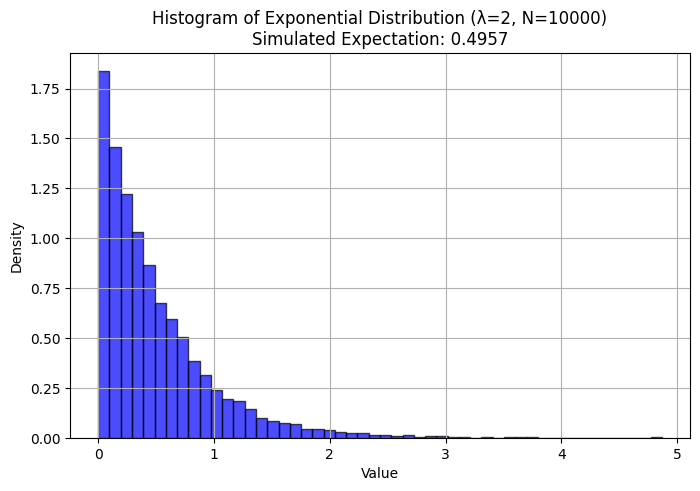

Simulated Expectation: 0.4957
Theoretical Expectation: 0.5000


In [ ]:
def generate_exponential(lam, N):
    U = np.random.uniform(0, 1, size=N)
    X = -np.log(U) / lam
    return X

lam = int(input("enter the value of lambda"))
N = int(input("emter the value of N"))

exp_samples = generate_exponential(lam, N)

simulated_expectation = np.mean(exp_samples)

theoretical_expectation = 1 / lam

plt.figure(figsize=(8, 5))
plt.hist(exp_samples, bins=50, density=True, color='b', edgecolor='black', alpha=0.7)
plt.xlabel("Value")
plt.ylabel("Density")
plt.title(f"Histogram of Exponential Distribution (λ={lam}, N={N})\nSimulated Expectation: {simulated_expectation:.4f}")
plt.grid()
plt.show()

print(f"Simulated Expectation: {simulated_expectation:.4f}")
print(f"Theoretical Expectation: {theoretical_expectation:.4f}")

#lam=2
#N=10000


# **QUES-4**

enter the value of mu5
enter the value of sigma10
enter the value of N10000


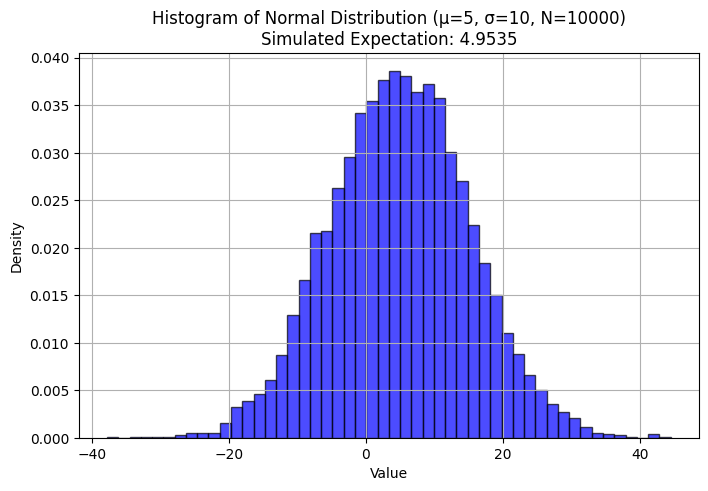

Simulated Expectation: 4.9535
Theoretical Expectation: 5.0000


In [5]:
def generate_normal(mu, sigma, N):
    U1 = np.random.uniform(0, 1, N//2)
    U2 = np.random.uniform(0, 1, N//2)

    Z1 = np.sqrt(-2 * np.log(U1)) * np.cos(2 * np.pi * U2)
    Z2 = np.sqrt(-2 * np.log(U1)) * np.sin(2 * np.pi * U2)

    X = np.concatenate((Z1, Z2)) * sigma + mu
    return X[:N]

mu=int(input("enter the value of mu"))
sigma = int(input("enter the value of sigma"))
N = int(input("enter the value of N"))

normal_samples = generate_normal(mu, sigma, N)

simulated_expectation = np.mean(normal_samples)

theoretical_expectation = mu

plt.figure(figsize=(8, 5))
plt.hist(normal_samples, bins=50, density=True, color='b', edgecolor='black', alpha=0.7)
plt.xlabel("Value")
plt.ylabel("Density")
plt.title(f"Histogram of Normal Distribution (μ={mu}, σ={sigma}, N={N})\nSimulated Expectation: {simulated_expectation:.4f}")
plt.grid()
plt.show()
100
print(f"Simulated Expectation: {simulated_expectation:.4f}")
print(f"Theoretical Expectation: {theoretical_expectation:.4f}")

#mu=5
#sigma=10
#N=10000

# **QUES-5**

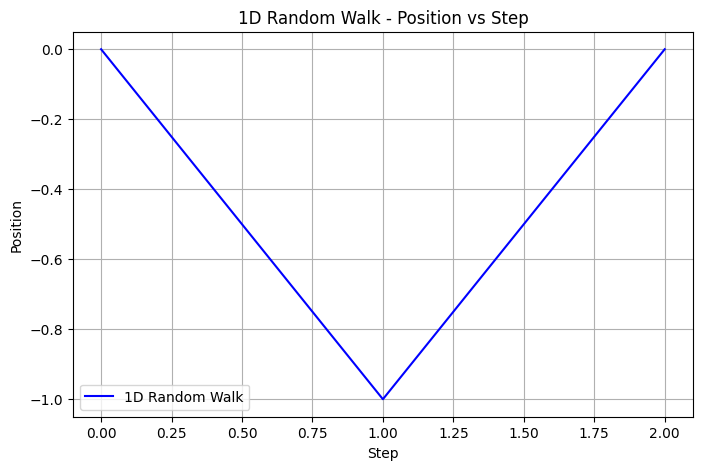

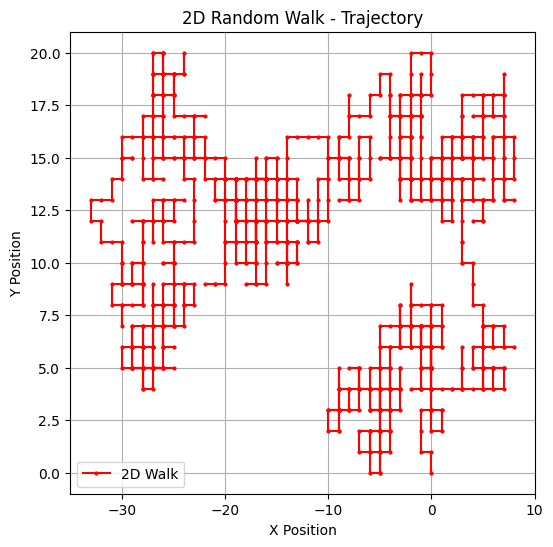

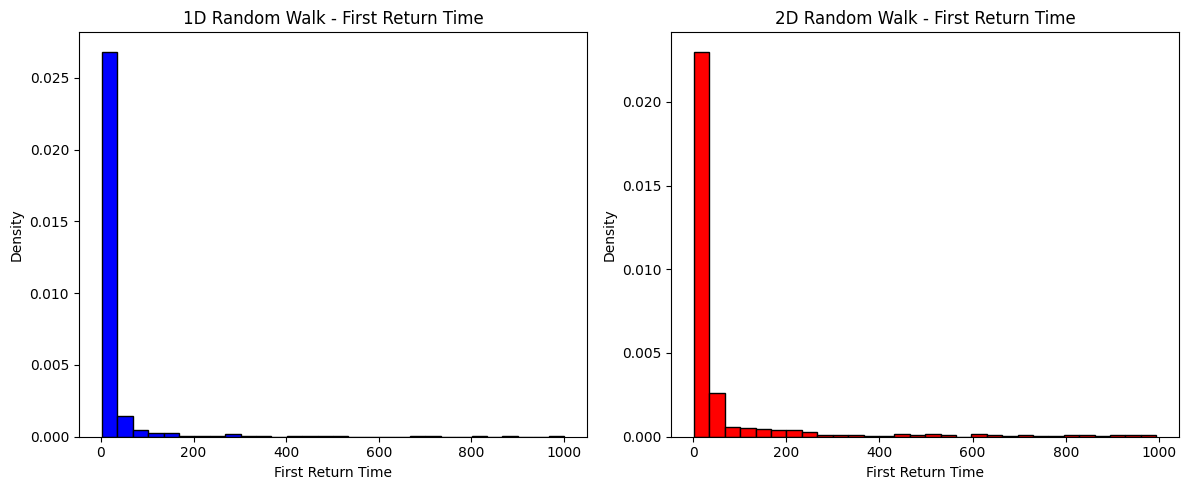

In [9]:
def random_walk_1D(N_simulations=1000, max_steps=1000, plot_trajectory=True):
    return_times = []
    if plot_trajectory:
        plt.figure(figsize=(8, 5))

    for sim in range(N_simulations):
        position = 0
        steps = 0
        positions = [0]

        while steps < max_steps:
            step = np.random.choice([-1, 1])
            position += step
            positions.append(position)
            steps += 1

            if position == 0 and steps > 0:
                return_times.append(steps)
                break

        if plot_trajectory and sim == 0:
            plt.plot(range(len(positions)), positions, label="1D Random Walk", color='b')

    if plot_trajectory:
        plt.xlabel("Step")
        plt.ylabel("Position")
        plt.title("1D Random Walk - Position vs Step")
        plt.legend()
        plt.grid()
        plt.show()

    return return_times

def random_walk_2D(N_simulations=1000, max_steps=1000, plot_trajectory=True):
    return_times = []
    if plot_trajectory:
        plt.figure(figsize=(6, 6))

    for sim in range(N_simulations):
        x, y = 0, 0
        steps = 0
        x_positions = [0]
        y_positions = [0]

        while steps < max_steps:
            direction = np.random.choice([0, 1])
            step = np.random.choice([-1, 1])

            if direction == 0:
                x += step
            else:
                y += step

            x_positions.append(x)
            y_positions.append(y)
            steps += 1

            if x == 0 and y == 0:
                return_times.append(steps)
                break

        if plot_trajectory and sim == 0:
            plt.plot(x_positions, y_positions, marker="o", markersize=2, linestyle="-", color='r', label="2D Walk")

    if plot_trajectory:
        plt.xlabel("X Position")
        plt.ylabel("Y Position")
        plt.title("2D Random Walk - Trajectory")
        plt.legend()
        plt.grid()
        plt.show()

    return return_times

N_simulations = 1000
return_times_1D = random_walk_1D(N_simulations)
return_times_2D = random_walk_2D(N_simulations)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(return_times_1D, bins=30, density=True, color='b', edgecolor='black')
plt.xlabel("First Return Time")
plt.ylabel("Density")
plt.title("1D Random Walk - First Return Time")

plt.subplot(1, 2, 2)
plt.hist(return_times_2D, bins=30, density=True, color='r', edgecolor='black')
plt.xlabel("First Return Time")
plt.ylabel("Density")
plt.title("2D Random Walk - First Return Time")

plt.tight_layout()
plt.show()
